In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#read in the data using pandas
df = pd.read_csv('diabetes.csv')
#check data has been read in properly
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']
x
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [4]:
from sklearn.linear_model import LogisticRegression
# Create Logistic Regression classifier
logmodel = LogisticRegression(max_iter=1000)
# Fit the classifier to the data
logmodel.fit(x,y)

LogisticRegression(max_iter=1000)

In [5]:
logmodel.coef_


array([[ 1.22497018e-01,  3.51139450e-02, -1.33021411e-02,
         7.92244110e-04, -1.17459864e-03,  8.96139928e-02,
         8.68328723e-01,  1.49948478e-02]])

In [6]:
logmodel.intercept_

array([-8.3648862])

In [7]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logmodel.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":x.columns,"Coefficients":np.transpose(logmodel.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                  Variables  Coefficients
0                 Intercept     -8.364886
1               Pregnancies      0.122497
2                   Glucose      0.035114
3             BloodPressure     -0.013302
4             SkinThickness      0.000792
5                   Insulin     -0.001175
6                       BMI      0.089614
7  DiabetesPedigreeFunction      0.868329
8                       Age      0.014995


In [8]:
logmodel.score(x,y)

0.78125

In [9]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [10]:
from sklearn.linear_model import LogisticRegression
# Create Logistic Regression classifier
logmodel = LogisticRegression(max_iter=1000)
# Fit the classifier to the data
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [11]:
#Make prediction using test data
y_pred = logmodel.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [12]:
y_test

488    0
413    0
112    0
222    0
711    0
      ..
139    0
178    0
654    0
110    1
102    0
Name: Outcome, Length: 154, dtype: int64

In [13]:
# Use score method to get test accuracy of model
score = logmodel.score(x_test, y_test)
print(score)

0.7857142857142857


In [14]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logmodel.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":x.columns,"Coefficients":np.transpose(logmodel.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                  Variables  Coefficients
0                 Intercept     -8.397104
1               Pregnancies      0.134735
2                   Glucose      0.034457
3             BloodPressure     -0.016894
4             SkinThickness     -0.004598
5                   Insulin     -0.000593
6                       BMI      0.096823
7  DiabetesPedigreeFunction      1.131844
8                       Age      0.014429


In [15]:
# Use score method to get training accuracy of model
score = logmodel.score(x_train, y_train)
print(score)

0.7850162866449512


In [16]:
from sklearn import metrics

In [17]:
# import the metrics class
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
#sonfusion matrix test seti üzerinden üretilmeli
cnf_matrix

array([[92,  8],
       [25, 29]])

In [18]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    sns.set(font_scale=1.5)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)


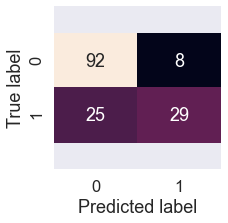

In [19]:
plot_conf_mat(y_test, y_pred)

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7857142857142857
Precision: 0.7837837837837838
Recall: 0.5370370370370371


In [21]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
488,4,99,72,17,0,25.6,0.294,28
413,1,143,74,22,61,26.2,0.256,21
112,1,89,76,34,37,31.2,0.192,23
222,7,119,0,0,0,25.2,0.209,37
711,5,126,78,27,22,29.6,0.439,40
...,...,...,...,...,...,...,...,...
139,5,105,72,29,325,36.9,0.159,28
178,5,143,78,0,0,45.0,0.190,47
654,1,106,70,28,135,34.2,0.142,22
110,3,171,72,33,135,33.3,0.199,24


In [22]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [23]:
y_pred_proba = logmodel.predict_proba(x_test)[::,1]
y_pred_proba

array([0.07405748, 0.1689723 , 0.04361264, 0.46426977, 0.28972517,
       0.22729438, 0.02975195, 0.09708984, 0.77742323, 0.05024051,
       0.21977532, 0.05515284, 0.74204904, 0.02976036, 0.04933119,
       0.28647854, 0.27815671, 0.52524081, 0.13815548, 0.6840451 ,
       0.7445765 , 0.08270818, 0.43701742, 0.02800556, 0.2277261 ,
       0.16755191, 0.47651968, 0.08708975, 0.04943562, 0.06282326,
       0.06345449, 0.003282  , 0.02680183, 0.24142186, 0.70468891,
       0.86923143, 0.17485564, 0.85557316, 0.15916502, 0.1498547 ,
       0.08868758, 0.87617486, 0.14312061, 0.45708239, 0.25185066,
       0.22876204, 0.24373232, 0.11731103, 0.52272471, 0.9219009 ,
       0.04007008, 0.19154888, 0.64819515, 0.40691837, 0.21215282,
       0.29352765, 0.15178452, 0.03190889, 0.66562291, 0.7111144 ,
       0.0588135 , 0.24042296, 0.03062684, 0.09003964, 0.977326  ,
       0.10396308, 0.00183696, 0.81191686, 0.03699036, 0.40600989,
       0.63398842, 0.04429874, 0.39082053, 0.39872387, 0.48597

In [24]:
logmodel.predict_proba(x_test)

array([[0.92594252, 0.07405748],
       [0.8310277 , 0.1689723 ],
       [0.95638736, 0.04361264],
       [0.53573023, 0.46426977],
       [0.71027483, 0.28972517],
       [0.77270562, 0.22729438],
       [0.97024805, 0.02975195],
       [0.90291016, 0.09708984],
       [0.22257677, 0.77742323],
       [0.94975949, 0.05024051],
       [0.78022468, 0.21977532],
       [0.94484716, 0.05515284],
       [0.25795096, 0.74204904],
       [0.97023964, 0.02976036],
       [0.95066881, 0.04933119],
       [0.71352146, 0.28647854],
       [0.72184329, 0.27815671],
       [0.47475919, 0.52524081],
       [0.86184452, 0.13815548],
       [0.3159549 , 0.6840451 ],
       [0.2554235 , 0.7445765 ],
       [0.91729182, 0.08270818],
       [0.56298258, 0.43701742],
       [0.97199444, 0.02800556],
       [0.7722739 , 0.2277261 ],
       [0.83244809, 0.16755191],
       [0.52348032, 0.47651968],
       [0.91291025, 0.08708975],
       [0.95056438, 0.04943562],
       [0.93717674, 0.06282326],
       [0.

In [25]:
threshold = 0.2
y_pred = (y_pred_proba > threshold).astype('float')
y_pred

array([0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0.])

In [26]:
y_test

488    0
413    0
112    0
222    0
711    0
      ..
139    0
178    0
654    0
110    1
102    0
Name: Outcome, Length: 154, dtype: int64

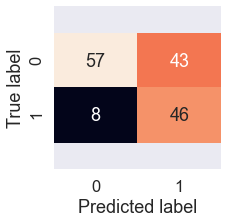

In [27]:
plot_conf_mat(y_test, y_pred)

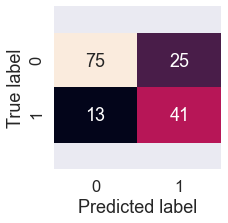

In [28]:
threshold = 0.3
y_pred = (y_pred_proba > threshold).astype('float')
plot_conf_mat(y_test, y_pred)

In [29]:
y_test


488    0
413    0
112    0
222    0
711    0
      ..
139    0
178    0
654    0
110    1
102    0
Name: Outcome, Length: 154, dtype: int64

In [30]:
y_pred_proba

array([0.07405748, 0.1689723 , 0.04361264, 0.46426977, 0.28972517,
       0.22729438, 0.02975195, 0.09708984, 0.77742323, 0.05024051,
       0.21977532, 0.05515284, 0.74204904, 0.02976036, 0.04933119,
       0.28647854, 0.27815671, 0.52524081, 0.13815548, 0.6840451 ,
       0.7445765 , 0.08270818, 0.43701742, 0.02800556, 0.2277261 ,
       0.16755191, 0.47651968, 0.08708975, 0.04943562, 0.06282326,
       0.06345449, 0.003282  , 0.02680183, 0.24142186, 0.70468891,
       0.86923143, 0.17485564, 0.85557316, 0.15916502, 0.1498547 ,
       0.08868758, 0.87617486, 0.14312061, 0.45708239, 0.25185066,
       0.22876204, 0.24373232, 0.11731103, 0.52272471, 0.9219009 ,
       0.04007008, 0.19154888, 0.64819515, 0.40691837, 0.21215282,
       0.29352765, 0.15178452, 0.03190889, 0.66562291, 0.7111144 ,
       0.0588135 , 0.24042296, 0.03062684, 0.09003964, 0.977326  ,
       0.10396308, 0.00183696, 0.81191686, 0.03699036, 0.40600989,
       0.63398842, 0.04429874, 0.39082053, 0.39872387, 0.48597

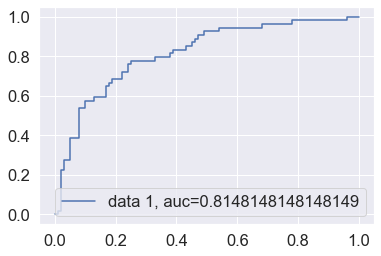

In [39]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
#roc_curve için içine y_test ve tahmin edilen prob değerlerini veriyoruz.

auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [32]:
df = pd.read_csv('diabetes.csv')
#check data has been read in properly

In [44]:
X=df[['Glucose','BMI']]
y = df['Outcome']

In [45]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [46]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [47]:
#Decision boundry çizdirilen fonksiyon
def plot_dec_boundary(estimator,X,Y,h):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    X=np.array(X)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

<ipython-input-47-330ac0de9a9b>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


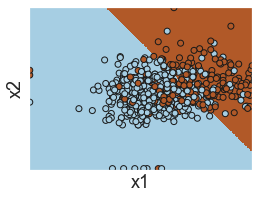

In [48]:
plot_dec_boundary(classifier,X_train,y_train,h=0.25)

<ipython-input-41-330ac0de9a9b>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


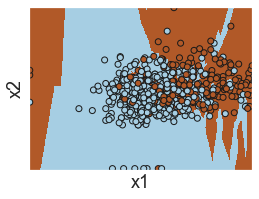

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)
plot_dec_boundary(classifier,X_train,y_train,h=0.25)